Importing required Modules

In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import csv
import numpy as np # linear algebra
#from numpy import genfromtxt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
from tensorflow.keras.optimizers import RMSprop 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
       print(os.path.join(dirname, filename))



# Any results you write to the current directory are saved as output.

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/test.csv


Converting CSV data file to numpy array for training and validation set

In [36]:
path_train = '/kaggle/input/digit-recognizer/train.csv'
path_test = '/kaggle/input/digit-recognizer/test.csv'

with open(path_train,'r') as csvfile:
    csv_reader=csv.reader(csvfile,delimiter=',')
    data_frame_train=list(csv_reader)
    [len_train ,_] =np.shape(data_frame_train)
    
#Converting CSV file values to numpy array into training and validation data sets
    
with open(path_test,'r') as csvfile:
    csv_reader=csv.reader(csvfile,delimiter=',')
    data_frame_test=list(csv_reader)
    [len_test,_]= np.shape(data_frame_test)
    
number_test=[]
number_train=[]
labels_train=[]

for i in range(1,len_train):
    num=data_frame_train[i] 
    labels_train.append(num[0])
    number_train.append(np.reshape(num[1:785],(28,28)))
number_train=np.array(number_train)
labels_train=np.array(labels_train)

for i in range(1,len_test):
    num=data_frame_test[i] 
    number_test.append(np.reshape(num[0:784],(28,28)))
number_test=np.array(number_test)



In [37]:
print("Data type of training set" + str(type(number_train)))
print("Data type of testing set" + str(type(number_test)))
print("Data type of training label set" + str(type(labels_train)))


print("Shape of training images is :" + str(number_train.shape))
print("Shape of testing images is :" + str(number_test.shape))

Data type of training set<class 'numpy.ndarray'>
Data type of testing set<class 'numpy.ndarray'>
Data type of training label set<class 'numpy.ndarray'>
Shape of training images is :(42000, 28, 28)
Shape of testing images is :(28000, 28, 28)


Few Examples of given data 

Some of Training images are :
0
1
4
0


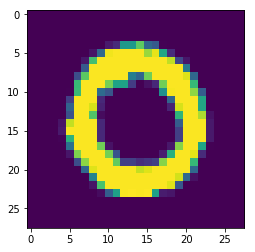

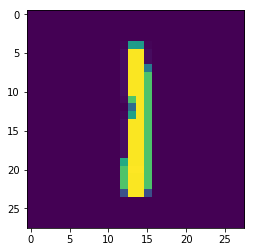

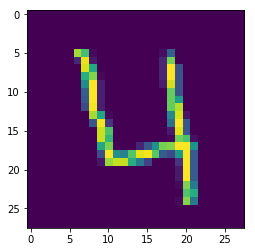

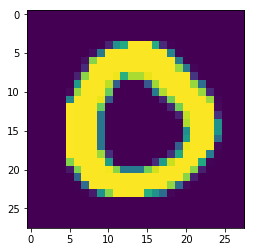

<Figure size 432x288 with 0 Axes>

In [38]:
print('Some of Training images are :')
for i in range(1,5):
    plt.imshow(number_train[i].astype(float))
    plt.figure(i+1)
    print(labels_train[i])



CallBack

In [39]:

class myCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if (logs.get('acc')>0.995):
            print('The training is stopped, as accuracy has reached upto 99%')
            self.model.stop_training=True
        


In [40]:
callbacks = myCallBack()

number_train=number_train.astype(int)
number_test=number_test.astype(int)
labels_train=labels_train.astype(int)
number_train=number_train/255
number_test=number_test/255
number_train=number_train.reshape(42000,28,28,1)
number_test=number_test.reshape(28000,28,28,1)

CNN Model

In [41]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               819712    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

Compile the Model

In [42]:
model.compile(optimizer=RMSprop(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['acc'])

Fitting of the model on the given data 

In [43]:
#callbacks= myCallBack()
data=model.fit(
    number_train,
    labels_train,
    epochs=10,
    verbose=2,
    callbacks=[callbacks]
)

Train on 42000 samples
Epoch 1/10
42000/42000 - 38s - loss: 0.1263 - acc: 0.9605
Epoch 2/10
42000/42000 - 36s - loss: 0.0428 - acc: 0.9865
Epoch 3/10
The training is stopped, as accuracy has reached upto 99%
42000/42000 - 36s - loss: 0.0312 - acc: 0.9908


Testing the model

In [44]:
prediction=model.predict(number_test.astype(float))

5
7
4
0
4
3


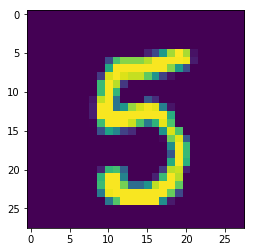

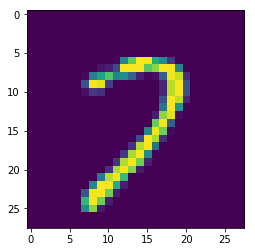

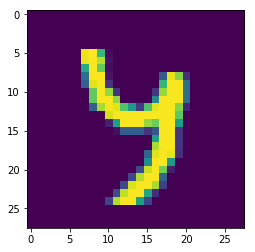

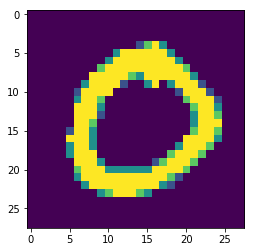

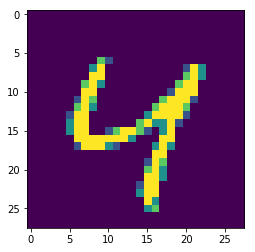

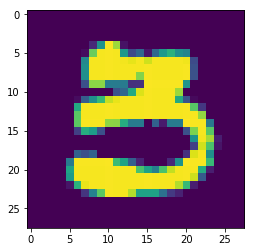

<Figure size 432x288 with 0 Axes>

In [46]:

max_value=np.argmax(prediction, axis=1)
for i in range(10,16):
    print(max_value[i])
    number_test=number_test.reshape(28000,28,28)
    plt.imshow(number_test[i].astype(float))
    plt.figure(i)
